In [13]:
import xarray

import matplotlib.pyplot as plt
import numpy as np


In [14]:
# checl the data from 2020 to 2023

data_tp_20_to_23 = xarray.open_dataset('/Users/jules/Documents/data/era5_total_percipitation_2020-2023/era5_total_percipitation_2020-2023.nc')

In [15]:
data_tp_20_to_23.time

<xarray.DataArray 'time' (time: 35064)>
array(['2020-01-01T00:00:00.000000000', '2020-01-01T01:00:00.000000000',
       '2020-01-01T02:00:00.000000000', ..., '2023-12-31T21:00:00.000000000',
       '2023-12-31T22:00:00.000000000', '2023-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2023-12-31T23:00:00
Attributes:
    long_name:  time

In [16]:
# get data from 2020 only
data_tp_2020 = data_tp_20_to_23.sel(time=slice('2020-01-01', '2020-12-31'))

In [17]:
data_tp_2020.latitude

<xarray.DataArray 'latitude' (latitude: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [18]:
# filter to only halle an der saale lats and lons
data_tp_2020_halle = data_tp_2020.sel(latitude=51.48, longitude=12.0, method='nearest')
data_tp_20_to_23_halle = data_tp_20_to_23.sel(latitude=51.48, longitude=12.0, method='nearest')

In [19]:
# pick expver=1
data_tp_2020_halle = data_tp_2020_halle.sel(expver=1)
data_tp_20_to_23_halle = data_tp_20_to_23_halle.sel(expver=1)

In [20]:
# get the max value and corresponding time
max_value = data_tp_20_to_23_halle.tp.max()
print(max_value.values)
print(data_tp_20_to_23_halle.time[data_tp_20_to_23_halle.tp.argmax()].values)

0.0428507924079895
2023-12-01T07:00:00.000000000


# 2020-23

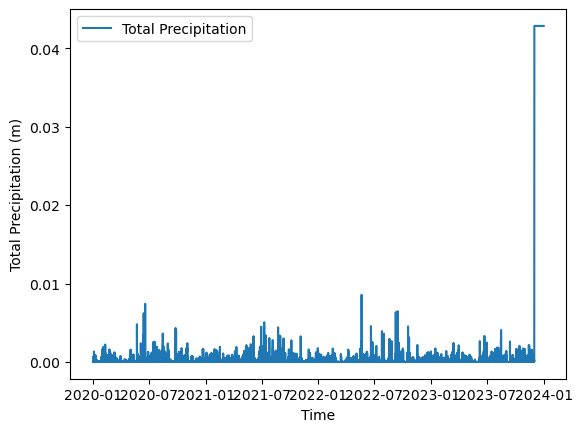

In [21]:
plt.plot(data_tp_20_to_23_halle.time, data_tp_20_to_23_halle.tp)
plt.xlabel('Time')
plt.ylabel('Total Precipitation (m)')
# legend
plt.legend(['Total Precipitation'])

# 2020

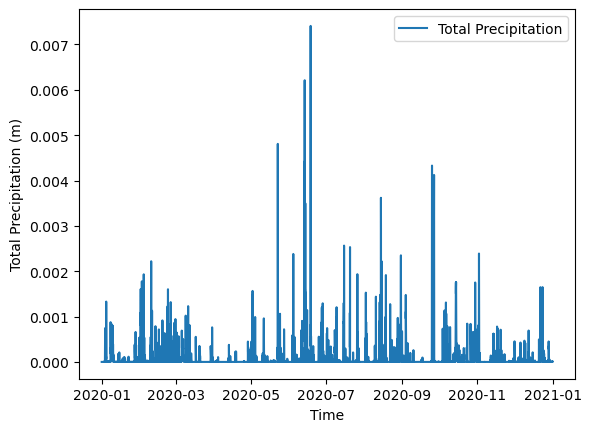

In [22]:
# plot total precipitation vs time

plt.plot(data_tp_2020_halle.time, data_tp_2020_halle.tp)
plt.xlabel('Time')
plt.ylabel('Total Precipitation (m)')
# legend
plt.legend(['Total Precipitation'])

(array([18423., 18424., 18425., 18426., 18427., 18428., 18429., 18430.]),
 [Text(18423.0, 0, '2020-06-10'),
  Text(18424.0, 0, '2020-06-11'),
  Text(18425.0, 0, '2020-06-12'),
  Text(18426.0, 0, '2020-06-13'),
  Text(18427.0, 0, '2020-06-14'),
  Text(18428.0, 0, '2020-06-15'),
  Text(18429.0, 0, '2020-06-16'),
  Text(18430.0, 0, '2020-06-17')])

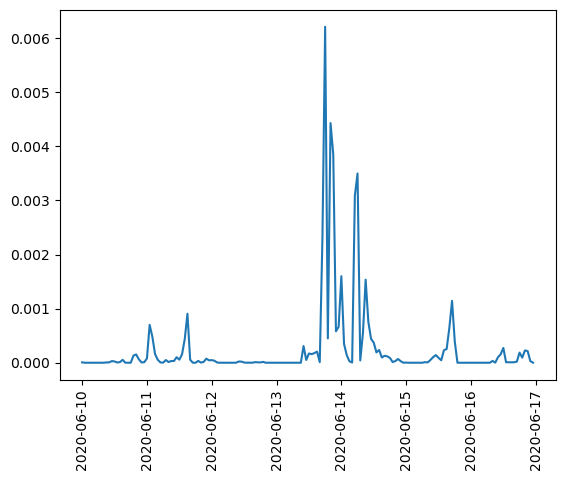

In [23]:
# get only may to july
data_tp_2020_halle_july = data_tp_2020_halle.sel(time=slice('2020-06-10', '2020-06-16'))
plt.plot(data_tp_2020_halle_july.time, data_tp_2020_halle_july.tp)
# x axis tick vertical
plt.xticks(rotation=90)

(array([18426.   , 18426.125, 18426.25 , 18426.375, 18426.5  , 18426.625,
        18426.75 , 18426.875]),
 [Text(18426.0, 0, '06-13 00'),
  Text(18426.125, 0, '06-13 03'),
  Text(18426.25, 0, '06-13 06'),
  Text(18426.375, 0, '06-13 09'),
  Text(18426.5, 0, '06-13 12'),
  Text(18426.625, 0, '06-13 15'),
  Text(18426.75, 0, '06-13 18'),
  Text(18426.875, 0, '06-13 21')])

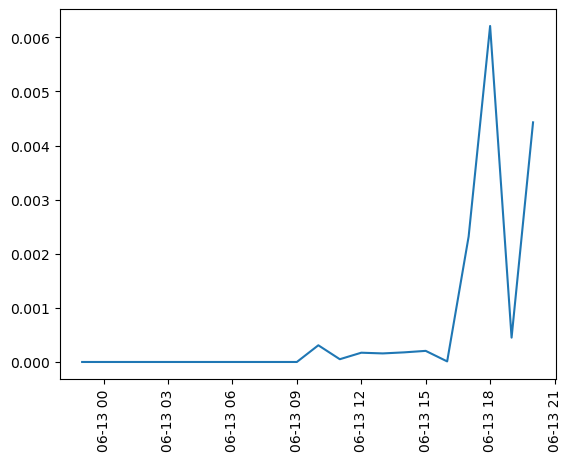

In [24]:
#data_tp_2020_halle_july = data_tp_2020_halle.sel(time=slice('2020-06-13', '2020-06-15'))
# slice 13_06 in hours
data_tp_2020_halle_july = data_tp_2020_halle.sel(time=slice('2020-06-12T23:00:00', '2020-06-13T20:00:00'))
plt.plot(data_tp_2020_halle_july.time, data_tp_2020_halle_july.tp)
# x axis tick vertical
plt.xticks(rotation=90)

# => input 13.06 bis 12:00 

In [25]:
# 14.6.2020 it is
# hoher niederschlag in esri daten und online
# https://www.wetterkontor.de/de/wetter/deutschland/rueckblick.asp?id=S713&datum0=18.05.2020&datum1=14.06.2020&jr=2024&mo=2&datum=20.06.2020&t=4&part=2

In [26]:
data_tp_13_06_3_steps = xarray.open_dataset('possible_10step_steps_predictions_13_06.nc')


# sel the data for halle
data_tp_13_06_3_steps_halle = data_tp_13_06_3_steps.sel(lat=51.48, lon=12.0, method='nearest')

In [27]:
data_tp_13_06_3_steps_halle.time.values 

array([ 21600000000000,  43200000000000,  64800000000000,  86400000000000,
       108000000000000, 129600000000000, 151200000000000, 172800000000000,
       194400000000000, 216000000000000, 237600000000000, 259200000000000,
       280800000000000, 302400000000000, 324000000000000, 345600000000000,
       367200000000000, 388800000000000, 410400000000000, 432000000000000,
       453600000000000, 475200000000000, 496800000000000, 518400000000000],
      dtype='timedelta64[ns]')

In [28]:
print(data_tp_13_06_3_steps_halle.time.values / 3600 / 1e9)

[  6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 102 108
 114 120 126 132 138 144]


In [29]:
total_precipitation_13_06 = data_tp_13_06_3_steps_halle.total_precipitation_6hr

In [30]:
time = ["+6h", "+12h", "+18h", "+24h", "+30h", "+36h", "+42h", "+48h", "+54h", "+60h", "+66h", "+72h", "+78h", "+84h", "+90h", "+96h", "+102h", "+108h", "+114h", "+120h", "+126h", "+132h", "+138h", "+144h"]

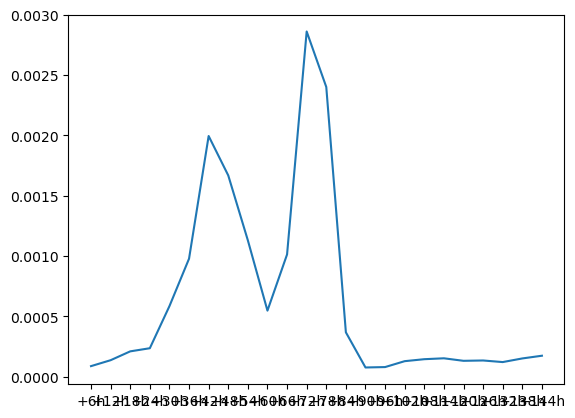

In [31]:
# plot total precipitation vs time
plt.plot(time, total_precipitation_13_06)

In [32]:
print(total_precipitation_13_06)

<xarray.DataArray 'total_precipitation_6hr' (time: 24, batch: 1)>
array([[8.730536e-05],
       [1.364879e-04],
       [2.097977e-04],
       [2.357809e-04],
       [5.846983e-04],
       [9.781584e-04],
       [1.995216e-03],
       [1.668570e-03],
       [1.130346e-03],
       [5.475794e-04],
       [1.013421e-03],
       [2.861941e-03],
       [2.401667e-03],
       [3.675529e-04],
       [7.616972e-05],
       [7.953362e-05],
       [1.284841e-04],
       [1.448397e-04],
       [1.522634e-04],
       [1.313841e-04],
       [1.341680e-04],
       [1.209444e-04],
       [1.511035e-04],
       [1.736068e-04]], dtype=float32)
Coordinates:
  * time     (time) timedelta64[ns] 0 days 06:00:00 ... 6 days 00:00:00
    lon      float32 12.0
    lat      float32 51.5
Dimensions without coordinates: batch


In [33]:
print(total_precipitation_13_06.values)

[[8.7305358e-05]
 [1.3648787e-04]
 [2.0979765e-04]
 [2.3578087e-04]
 [5.8469834e-04]
 [9.7815844e-04]
 [1.9952157e-03]
 [1.6685695e-03]
 [1.1303457e-03]
 [5.4757937e-04]
 [1.0134213e-03]
 [2.8619415e-03]
 [2.4016674e-03]
 [3.6755292e-04]
 [7.6169723e-05]
 [7.9533624e-05]
 [1.2848414e-04]
 [1.4483965e-04]
 [1.5226343e-04]
 [1.3138406e-04]
 [1.3416797e-04]
 [1.2094437e-04]
 [1.5110346e-04]
 [1.7360678e-04]]


In [34]:
total_precipitation_13_06[1].values

array([0.00013649], dtype=float32)

In [35]:
input_0 = data_tp_2020_halle.sel(time='2020-06-13T00:00:00', method='nearest')
input_6 = data_tp_2020_halle.sel(time='2020-06-13T06:00:00', method='nearest')
input_12 = data_tp_2020_halle.sel(time='2020-06-13T12:00:00', method='nearest')

input_18 = data_tp_2020_halle.sel(time='2020-06-13T18:00:00', method='nearest')
input_24 = data_tp_2020_halle.sel(time='2020-06-14T00:00:00', method='nearest')
input_30 = data_tp_2020_halle.sel(time='2020-06-14T06:00:00', method='nearest')

In [58]:
# sel 24 vals in 6h steps data_tp_2020_halle.sel(time='2020-06-13T00:00:00', method='nearest')
inputos = [data_tp_2020_halle.sel(time='2020-06-13T00:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-13T06:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-13T12:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-13T18:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-14T00:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-14T06:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-14T12:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-14T18:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-15T00:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-15T06:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-15T12:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-15T18:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-16T00:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-16T06:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-16T12:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-16T18:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-17T00:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-17T06:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-17T12:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-17T18:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-18T00:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-18T06:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-18T12:00:00', method='nearest').tp.values.item(),
         data_tp_2020_halle.sel(time='2020-06-18T18:00:00', method='nearest').tp.values.item()]


In [63]:
len(pred)

24

ValueError: x and y must have same first dimension, but have shapes (27,) and (24,)

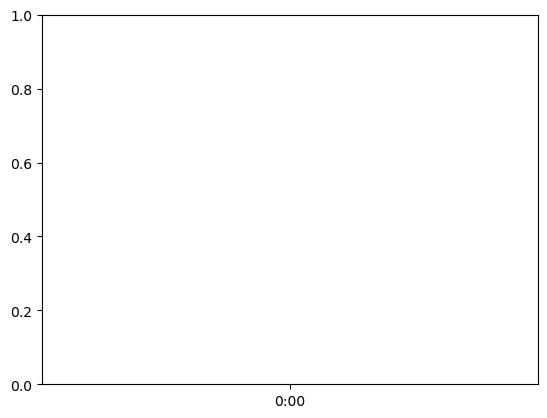

In [64]:
time = ["0:00", "06:00", "12:00", "+6h", "+12h", "+18h", "+24h", "+30h", "+36h", "+42h", "+48h", "+54h", "+60h", "+66h", "+72h", "+78h", "+84h", "+90h", "+96h", "+102h", "+108h", "+114h", "+120h", "+126h", "+132h", "+138h", "+144h"]
input = [input_0.tp.values.item(), input_6.tp.values.item(), input_12.tp.values.item()]

pred = [total_precipitation_13_06[i].values[0] for i in range(24)]
#pred = [total_precipitation_13_06[0].values[0], total_precipitation_13_06[1].values[0], total_precipitation_13_06[2].values[0]]
input2 = [input_18.tp.values.item(), input_24.tp.values.item(), input_30.tp.values.item()]
values_input = input + input2


values_pred = input + pred

# plot values_input and values_pred in different colors
plt.plot(time, inputos, 'r')
plt.plot(time, pred, 'b')
plt.xlabel('Time')
plt.ylabel('Total Precipitation (m)')
# legend
plt.legend(['Input', 'Prediction'])

Text(0, 0.5, 'Total Precipitation (m)')

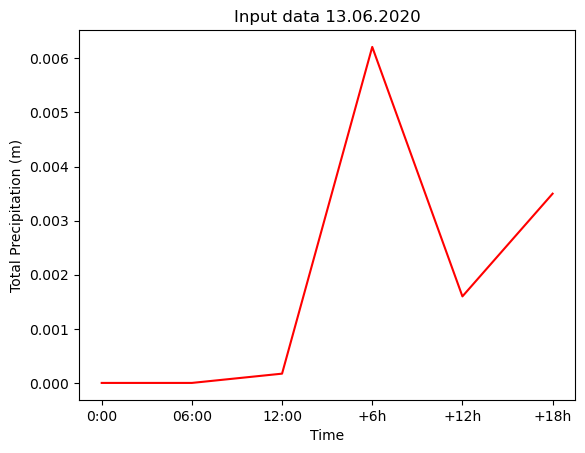

In [37]:

plt.plot(time, values_input, 'r')

# axis 
plt.title('Input data 13.06.2020')
plt.xlabel('Time')
plt.ylabel('Total Precipitation (m)')




Text(0, 0.5, 'Total Precipitation (m)')

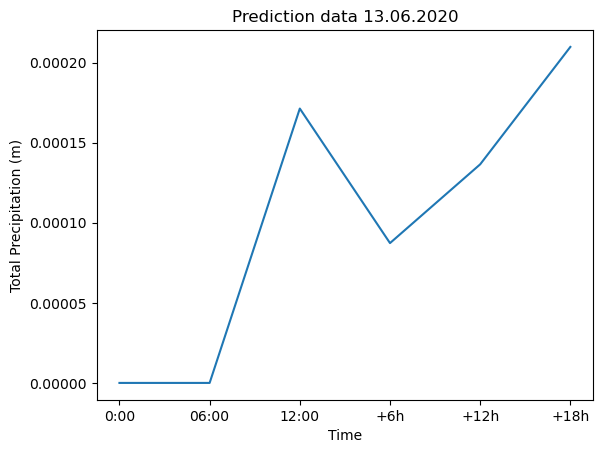

In [38]:

plt.plot(time, values_pred)

# axis 
plt.title('Prediction data 13.06.2020')
plt.xlabel('Time')
plt.ylabel('Total Precipitation (m)')